In [2]:
import h5py, os, json
import numpy as np
import matplotlib.pyplot as plt

input_path = '/data/chd_data/awe_data/robomimic/datasets/square/ph/image.hdf5'
output_dir = '/data/chd_data/my_lib/cnom_visualization/output'

file = h5py.File(input_path, 'r')
print(file.keys())

<KeysViewHDF5 ['data', 'mask']>


In [3]:
action = file['/data/demo_0/actions'][:]
action[8]

array([ 0.143     ,  0.466     , -0.09      , -0.01853819,  0.05849775,
        0.11674564, -1.        ])

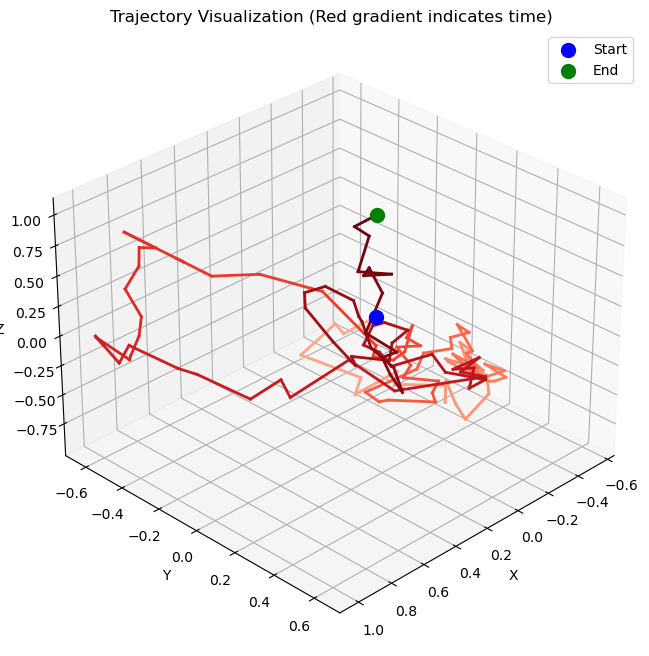

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# 提取 xyz 坐标
x, y, z = action[:, 0], action[:, 1], action[:, 2]

# 创建图形和3D轴
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 创建时间渐变的红色颜色映射
n_points = len(x)
colors = cm.Reds(np.linspace(0.3, 1, n_points))

# 绘制3D轨迹
for i in range(len(x)-1):
    ax.plot(x[i:i+2], y[i:i+2], z[i:i+2], 
            color=colors[i], 
            linewidth=2)

# 添加起点和终点标记
ax.scatter(x[0], y[0], z[0], color='blue', s=100, label='Start')
ax.scatter(x[-1], y[-1], z[-1], color='green', s=100, label='End')

# 设置轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 添加标题和图例
ax.set_title('Trajectory Visualization (Red gradient indicates time)')
ax.legend()

# 调整视角
ax.view_init(elev=30, azim=45)

# 显示图形
plt.show()


-0.0046319931359525635 -0.47941466455940257 0.013569691777496725
-0.008456198454207293 0.060246657835637187 0.003927790575983552
-0.00040696482706742746 0.06378053080686881 0.0030576382338005706
0.00962669649353071 0.05676086768593337 0.0033437451380986375
0.02161256072948639 0.044537341528650534 -0.0028030691079813956
0.031583712230421196 0.033940029014947526 -0.006762343355393725
0.042505374537658853 0.028741351944293288 -0.006015149334412313
0.051736881213028794 0.0307789262827697 -0.010383063347126364
0.05804160943639867 0.029734159183279908 -0.0075431633052014755
0.06336255422011867 0.02325309392319416 0.0003554081451970861
0.07107656625018613 0.019738760646657243 0.008192159968339503
0.07777902531479763 0.018467362797361126 0.015981333454255228
0.08490683681800275 0.019509269686625728 0.025058834542597715
0.0879455791626842 0.01956218150350017 0.03221361252750405
0.09219495091338668 0.014985127737495076 0.030084770661241163
0.09628161302606843 0.01111491370367109 0.02996704245845

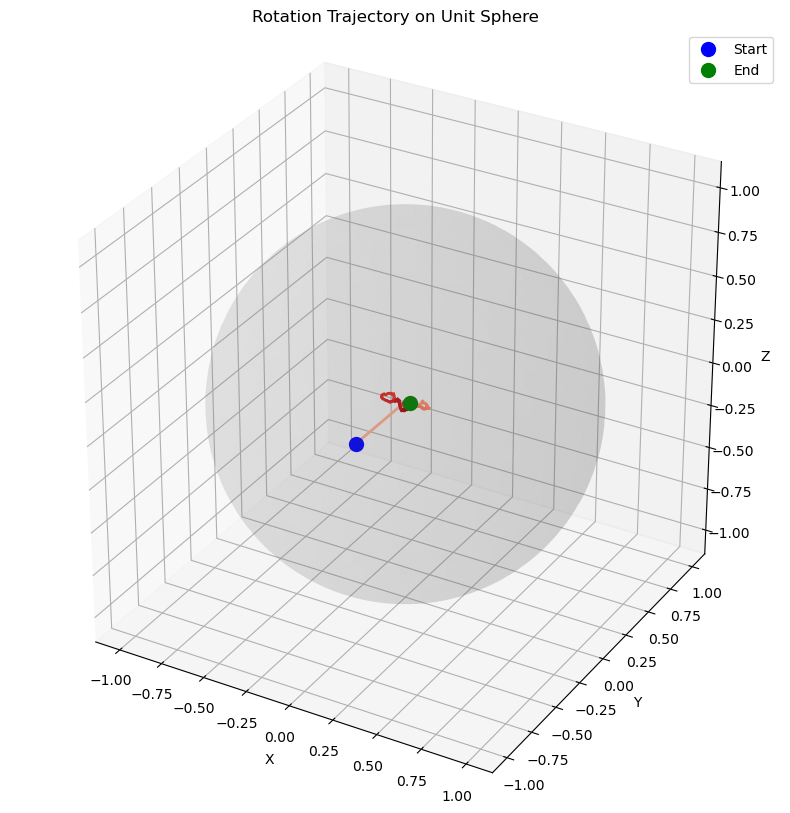

In [7]:
import numpy as np
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt

def visualize_rotation_trajectory(euler_angles, output_path, eular_type='xyz'):
    """
    Visualize rotation trajectory on unit sphere.
    
    Args:
        euler_angles: Array of shape (N, 3) containing euler angles in radians
        output_path: Path to save the visualization
    """
    # Convert Euler angles to quaternions
    rot = Rotation.from_euler(eular_type, euler_angles)
    quats = rot.as_quat()  # returns array of shape (N, 4) [x, y, z, w]
    
    # Create figure
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot unit sphere wireframe
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, alpha=0.1, color='gray')
    
    # Create time-gradient colormap
    n_points = len(quats)
    colors = plt.cm.Reds(np.linspace(0.3, 1, n_points))
    
    # Plot rotation trajectory
    for i in range(n_points-1):
        ax.plot(quats[i:i+2, 0], quats[i:i+2, 1], quats[i:i+2, 2],
                color=colors[i], linewidth=2)
        print(quats[i,0], quats[i,1], quats[i,2])
    
    # Add start and end points
    ax.scatter(quats[0, 0], quats[0, 1], quats[0, 2], 
              color='blue', s=100, label='Start')
    ax.scatter(quats[-1, 0], quats[-1, 1], quats[-1, 2], 
              color='green', s=100, label='End')
    
    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Rotation Trajectory on Unit Sphere')
    
    # Set equal aspect ratio
    ax.set_box_aspect([1,1,1])
    
    # Add legend
    ax.legend()
    
    # Save figure
    # plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

# 使用示例：
action = file['/data/demo_0/actions'][:]
euler_angles = action[:, 3:6]  # 提取欧拉角部分
visualize_rotation_trajectory(euler_angles, 'rotation_trajectory.png', eular_type='zyx')

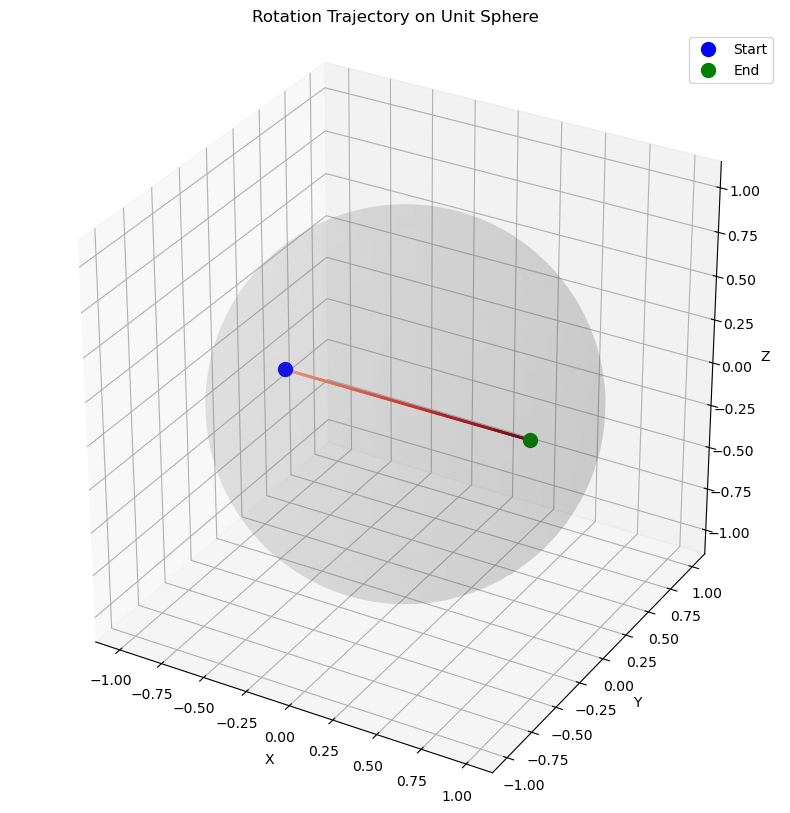

In [6]:
roll = np.linspace(-np.pi/2, np.pi/2, 100)
pitch = np.zeros_like(roll)
yaw = np.zeros_like(roll)
euler_angles = np.column_stack((roll, pitch, yaw))
visualize_rotation_trajectory(euler_angles, 'rotation_trajectory.png', eular_type='xyz')

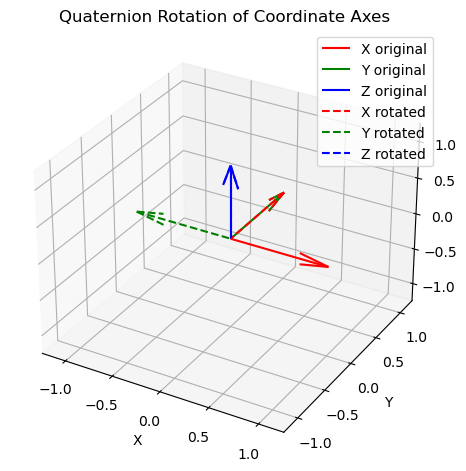

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

# 创建一个单位四元数（比如绕 Z 轴旋转 90°）
angle = np.pi / 2  # 90度
axis = np.array([0, 0, 1])  # Z轴
quat = R.from_rotvec(angle * axis)

# 原始坐标轴（单位向量）
origin = np.array([0, 0, 0])
x_axis = np.array([1, 0, 0])
y_axis = np.array([0, 1, 0])
z_axis = np.array([0, 0, 1])

# 应用四元数旋转
x_rot = quat.apply(x_axis)
y_rot = quat.apply(y_axis)
z_rot = quat.apply(z_axis)

# 可视化
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 原始坐标轴
ax.quiver(*origin, *x_axis, color='r', label='X original')
ax.quiver(*origin, *y_axis, color='g', label='Y original')
ax.quiver(*origin, *z_axis, color='b', label='Z original')

# 旋转后的坐标轴
ax.quiver(*origin, *x_rot, color='r', linestyle='dashed', label='X rotated')
ax.quiver(*origin, *y_rot, color='g', linestyle='dashed', label='Y rotated')
ax.quiver(*origin, *z_rot, color='b', linestyle='dashed', label='Z rotated')

# 设置图像参数
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1.2, 1.2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Quaternion Rotation of Coordinate Axes')
ax.legend()
plt.tight_layout()
plt.show()
